In [75]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

In [2]:
data = pd.read_csv('Hypertension_dataset.csv')
data

,SDNN,RMSSD,pNN50,pNN20,SBP_mean,counter_in,counter_out,acc_in,dec_in,acc_out,dec_out,incr_in,decr_in,incr_out,decr_out,label
0,52.324437,32.080966,0.056522,0.233333,129.247628,0.543353,0.456647,0.194203,0.266667,0.211594,0.166667,0.215630,0.299566,0.260492,0.219971,zdrowy
1,40.166414,30.713029,0.010363,0.067358,107.147034,0.492255,0.507745,0.091537,0.136442,0.153713,0.094991,0.166954,0.318417,0.266781,0.197935,chory
2,37.665435,30.466353,0.037908,0.247059,139.008217,0.530639,0.469361,0.130719,0.343791,0.334641,0.074510,0.165796,0.348564,0.295039,0.173629,zdrowy
3,64.031500,37.172742,0.069057,0.245684,120.831911,0.569536,0.430464,0.269588,0.250996,0.191235,0.166003,0.298013,0.243709,0.223841,0.218543,chory
4,45.060980,32.435503,0.031674,0.300151,130.497630,0.515789,0.484211,0.134238,0.334842,0.294118,0.125189,0.311350,0.151840,0.150307,0.320552,zdrowy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,42.067566,17.786552,0.002857,0.124286,144.699603,0.511396,0.488604,0.110000,0.251429,0.252857,0.085714,0.174286,0.294286,0.241429,0.222857,chory
58,68.792215,40.740101,0.095462,0.311424,109.358120,0.499220,0.500780,0.183099,0.247261,0.239437,0.190923,0.276131,0.212168,0.209048,0.301092,zdrowy
59,69.002551,67.320247,0.094241,0.310646,155.832799,0.532174,0.467826,0.164049,0.268761,0.240838,0.139616,0.127178,0.365854,0.271777,0.160279,chory
60,71.546798,63.512185,0.190381,0.364729,125.607306,0.477046,0.522954,0.180361,0.214429,0.238477,0.192385,0.186000,0.274000,0.236000,0.298000,chory


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SDNN         62 non-null     float64
 1   RMSSD        62 non-null     float64
 2   pNN50        62 non-null     float64
 3   pNN20        62 non-null     float64
 4   SBP_mean     62 non-null     float64
 5   counter_in   62 non-null     float64
 6   counter_out  62 non-null     float64
 7   acc_in       62 non-null     float64
 8   dec_in       62 non-null     float64
 9   acc_out      62 non-null     float64
 10  dec_out      62 non-null     float64
 11  incr_in      62 non-null     float64
 12  decr_in      62 non-null     float64
 13  incr_out     62 non-null     float64
 14  decr_out     62 non-null     float64
 15  label        62 non-null     object 
dtypes: float64(15), object(1)
memory usage: 7.9+ KB


In [4]:
data['label'].replace(['zdrowy', 'chory'], [0, 1], inplace = True)

In [5]:
data

,SDNN,RMSSD,pNN50,pNN20,SBP_mean,counter_in,counter_out,acc_in,dec_in,acc_out,dec_out,incr_in,decr_in,incr_out,decr_out,label
0,52.324437,32.080966,0.056522,0.233333,129.247628,0.543353,0.456647,0.194203,0.266667,0.211594,0.166667,0.215630,0.299566,0.260492,0.219971,0
1,40.166414,30.713029,0.010363,0.067358,107.147034,0.492255,0.507745,0.091537,0.136442,0.153713,0.094991,0.166954,0.318417,0.266781,0.197935,1
2,37.665435,30.466353,0.037908,0.247059,139.008217,0.530639,0.469361,0.130719,0.343791,0.334641,0.074510,0.165796,0.348564,0.295039,0.173629,0
3,64.031500,37.172742,0.069057,0.245684,120.831911,0.569536,0.430464,0.269588,0.250996,0.191235,0.166003,0.298013,0.243709,0.223841,0.218543,1
4,45.060980,32.435503,0.031674,0.300151,130.497630,0.515789,0.484211,0.134238,0.334842,0.294118,0.125189,0.311350,0.151840,0.150307,0.320552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,42.067566,17.786552,0.002857,0.124286,144.699603,0.511396,0.488604,0.110000,0.251429,0.252857,0.085714,0.174286,0.294286,0.241429,0.222857,1
58,68.792215,40.740101,0.095462,0.311424,109.358120,0.499220,0.500780,0.183099,0.247261,0.239437,0.190923,0.276131,0.212168,0.209048,0.301092,0
59,69.002551,67.320247,0.094241,0.310646,155.832799,0.532174,0.467826,0.164049,0.268761,0.240838,0.139616,0.127178,0.365854,0.271777,0.160279,1
60,71.546798,63.512185,0.190381,0.364729,125.607306,0.477046,0.522954,0.180361,0.214429,0.238477,0.192385,0.186000,0.274000,0.236000,0.298000,1


In [6]:
data_label = pd.DataFrame(data['label'])
data_features = data.drop(['label'], axis = 1)

In [7]:
data_label

,label
0,0
1,1
2,0
3,1
4,0
...,...
57,1
58,0
59,1
60,1


In [8]:
data_features

,SDNN,RMSSD,pNN50,pNN20,SBP_mean,counter_in,counter_out,acc_in,dec_in,acc_out,dec_out,incr_in,decr_in,incr_out,decr_out
0,52.324437,32.080966,0.056522,0.233333,129.247628,0.543353,0.456647,0.194203,0.266667,0.211594,0.166667,0.215630,0.299566,0.260492,0.219971
1,40.166414,30.713029,0.010363,0.067358,107.147034,0.492255,0.507745,0.091537,0.136442,0.153713,0.094991,0.166954,0.318417,0.266781,0.197935
2,37.665435,30.466353,0.037908,0.247059,139.008217,0.530639,0.469361,0.130719,0.343791,0.334641,0.074510,0.165796,0.348564,0.295039,0.173629
3,64.031500,37.172742,0.069057,0.245684,120.831911,0.569536,0.430464,0.269588,0.250996,0.191235,0.166003,0.298013,0.243709,0.223841,0.218543
4,45.060980,32.435503,0.031674,0.300151,130.497630,0.515789,0.484211,0.134238,0.334842,0.294118,0.125189,0.311350,0.151840,0.150307,0.320552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,42.067566,17.786552,0.002857,0.124286,144.699603,0.511396,0.488604,0.110000,0.251429,0.252857,0.085714,0.174286,0.294286,0.241429,0.222857
58,68.792215,40.740101,0.095462,0.311424,109.358120,0.499220,0.500780,0.183099,0.247261,0.239437,0.190923,0.276131,0.212168,0.209048,0.301092
59,69.002551,67.320247,0.094241,0.310646,155.832799,0.532174,0.467826,0.164049,0.268761,0.240838,0.139616,0.127178,0.365854,0.271777,0.160279
60,71.546798,63.512185,0.190381,0.364729,125.607306,0.477046,0.522954,0.180361,0.214429,0.238477,0.192385,0.186000,0.274000,0.236000,0.298000


<AxesSubplot:>

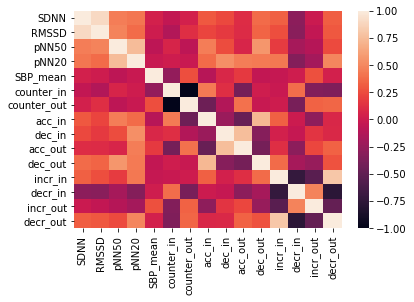

In [9]:
sns.heatmap(data_features.corr())

In [10]:
columns = ['SDNN', 'RMSSD', 'pNN50', 'pNN20', 'SBP_mean', 'counter_in', 'counter_out', 'acc_in', 'dec_in', 'acc_out', 'dec_out', 'incr_in', 'decr_in', 'incr_out', 'decr_out']

In [11]:
pipeline = Pipeline([('stdscaler', StandardScaler()), ('minmaxscaler', MinMaxScaler())])

In [12]:
rescaled_data = pd.DataFrame(pipeline.fit_transform(data_features), columns=columns)

In [13]:
rescaled_data

,SDNN,RMSSD,pNN50,pNN20,SBP_mean,counter_in,counter_out,acc_in,dec_in,acc_out,dec_out,incr_in,decr_in,incr_out,decr_out
0,0.264433,0.119967,0.156684,0.521111,0.578581,0.440478,0.559522,0.636538,0.521916,0.396664,0.576519,0.455500,0.558661,0.528321,0.615396
1,0.191996,0.113893,0.028727,0.150432,0.359617,0.215410,0.784590,0.276748,0.007917,0.174322,0.237694,0.251831,0.629950,0.552377,0.531906
2,0.177096,0.112798,0.105086,0.551765,0.675286,0.384479,0.615521,0.414060,0.826327,0.869331,0.140873,0.246989,0.743960,0.660458,0.439820
3,0.334183,0.142574,0.191434,0.548694,0.495201,0.555809,0.444191,0.900724,0.460064,0.318457,0.573381,0.800208,0.347423,0.388137,0.609986
4,0.221158,0.121541,0.087804,0.670337,0.590966,0.319072,0.680928,0.426393,0.791005,0.713667,0.380443,0.856010,0.000000,0.106881,0.996470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.203323,0.056500,0.007920,0.277571,0.731674,0.299720,0.700280,0.341450,0.461771,0.555170,0.193839,0.282510,0.538693,0.455407,0.626331
58,0.362547,0.158413,0.264630,0.695514,0.381523,0.246089,0.753911,0.597623,0.445323,0.503617,0.691186,0.708649,0.228146,0.331558,0.922741
59,0.363800,0.276429,0.261246,0.693775,0.841978,0.391240,0.608760,0.530863,0.530182,0.508999,0.448645,0.085402,0.809345,0.571485,0.389238
60,0.378959,0.259521,0.527756,0.814562,0.542514,0.148420,0.851580,0.588028,0.315732,0.499931,0.698095,0.331525,0.461977,0.434643,0.911026


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(rescaled_data, data_label, random_state = 133, test_size = 0.2, shuffle = True)

<AxesSubplot:ylabel='Count'>

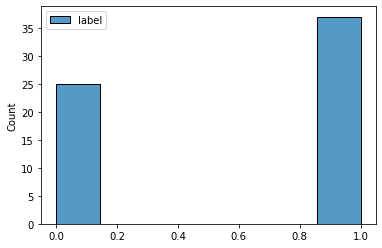

In [15]:
sns.histplot(data_label)

Liczba osob zdrowych i chorych trochę różni się od siebie. Trzeba zwrócić na to uwagę przy dokładności predykcji modelu.

In [16]:
print('Liczba osob zdrowych w zbiorze danych:', len(list(filter(lambda x: (x == 0), data_label['label']))))
print('Liczba osob chorych w zbiorze danych:', len(list(filter(lambda x: (x == 1), data_label['label']))))

Liczba osob zdrowych w zbiorze danych: 25
Liczba osob chorych w zbiorze danych: 37


In [17]:
X_train.shape, Y_train.shape

((49, 15), (49, 1))

In [18]:
X_test.shape, Y_test.shape

((13, 15), (13, 1))

<AxesSubplot:ylabel='Count'>

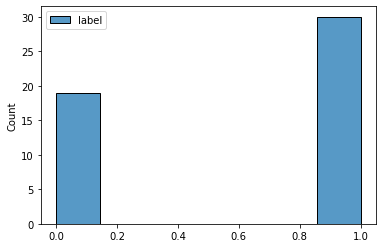

In [19]:
sns.histplot(Y_train)

In [20]:
print('Liczba osob zdrowych w treningowym zbiorze danych:', len(list(filter(lambda x: (x == 0), Y_train['label']))))
print('Liczba osob chorych w treningowym zbiorze danych:', len(list(filter(lambda x: (x == 1), Y_train['label']))))

Liczba osob zdrowych w treningowym zbiorze danych: 19
Liczba osob chorych w treningowym zbiorze danych: 30


<AxesSubplot:ylabel='Count'>

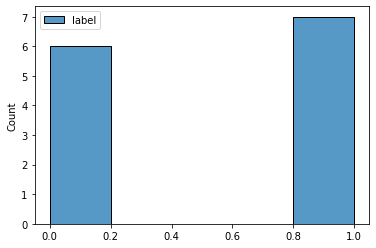

In [21]:
sns.histplot(Y_test)

In [22]:
print('Liczba osob zdrowych w testujacym zbiorze danych:', len(list(filter(lambda x: (x == 0), Y_test['label']))))
print('Liczba osob chorych w testujacym zbiorze danych:', len(list(filter(lambda x: (x == 1), Y_test['label']))))

Liczba osob zdrowych w testujacym zbiorze danych: 6
Liczba osob chorych w testujacym zbiorze danych: 7


In [23]:
pca = PCA(n_components = 2)

In [24]:
pca.fit(X_train)
X_train = pca.transform(X_train)

In [25]:
pca.explained_variance_ratio_

array([0.35103111, 0.20388026])

2 komponenty objaśniają jedynie 55% wariancji

<AxesSubplot:>

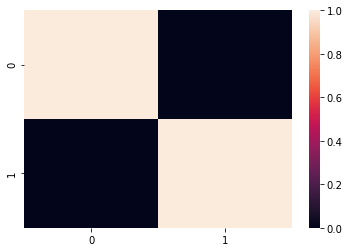

In [26]:
sns.heatmap(pd.DataFrame(X_train).corr())

In [27]:
X_train

array([[ 2.56800675e-01,  2.70848941e-02],
       [ 1.19257334e-01,  6.43245537e-01],
       [ 5.46852595e-01, -1.54444236e-02],
       [-8.00821242e-01, -1.84186258e-02],
       [-3.18895462e-01,  4.16363428e-01],
       [-3.52258612e-01, -3.89793439e-02],
       [ 1.23573742e-02, -3.17941087e-01],
       [-1.12835681e-01,  1.07025700e-01],
       [ 2.04902642e-01, -1.12275175e-01],
       [-2.93172662e-01, -3.88123070e-01],
       [ 2.13743265e-02,  1.04261009e-01],
       [-7.41117667e-01, -3.05958018e-01],
       [ 4.32978288e-01,  3.76830488e-01],
       [-1.38667562e-01,  5.33317638e-02],
       [-1.79814987e-01,  5.04887162e-01],
       [-7.16815829e-01, -4.06808217e-01],
       [ 7.86318976e-02,  2.71251811e-01],
       [-3.47398969e-01, -3.79486513e-01],
       [-3.68594238e-01,  2.32114394e-02],
       [-7.64125012e-01, -5.40348682e-01],
       [ 4.30960831e-01, -1.74468460e-01],
       [ 6.47401060e-01, -6.39907452e-02],
       [-1.37644621e-01,  5.14678913e-01],
       [-2.

In [28]:
len(X_train)

49

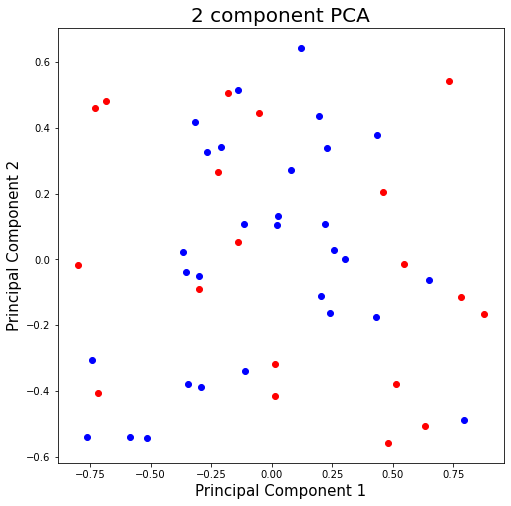

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for i in range(len(X_train)):
    if np.array(Y_train)[i] == 0:
        c = 'red'
    else:
        c = 'blue'
    ax.scatter(X_train[i][0], X_train[i][1], color = c)

Na podstawie wykresu można określić, że dane nie dzielą się na dwa dobrze separowalne zbiory

In [30]:
X_test = pca.transform(X_test)

In [31]:
X_test

array([[ 0.12940645,  0.41040276],
       [ 0.64268461, -0.54137771],
       [ 0.9035919 ,  0.05931309],
       [-0.25951795, -0.12812589],
       [-0.53069352,  0.0347667 ],
       [ 0.13034653, -0.24662553],
       [-0.43301284,  0.09606088],
       [-0.72033561, -0.08309399],
       [ 0.67473524, -0.25770647],
       [-0.17173242, -0.15318142],
       [ 0.11452114,  0.14521481],
       [ 0.3109816 ,  0.14152751],
       [-0.06535272, -0.05715556]])

In [32]:
Y_train = np.array(Y_train).reshape(len(Y_train))
Y_train

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0], dtype=int64)

In [33]:
Y_test = np.array(Y_test).reshape(len(Y_test))
Y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [34]:
grid = {
    'loss' : ['hinge', 'log'], #funkcja straty
    'penalty' : ['l1', 'l2'], #norma
    'alpha' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], #wspolczynnik regularyzacji
    'learning_rate' : ['constant'],
    'eta0' : [1e-4, 1e-3, 1e-2, 1e0, 1e1, 1e2], #wspolczynnik uczenia
    'max_iter' : [100, 200, 500, 1000, 2000, 3000], #liczba epok
    'random_state' : [False]
}

In [35]:
loss_function_list = []
penalty_list = []
alpha_list = []
lr_list = []
iter_list = []
accuracy_list = []
balanced_accuracy_list = []
recall_0_list = []
recall_1_list = []
precision_0_list = []
precision_1_list = []
f1_score_0_list = []
f1_score_1_list = []
auc_list = []
cv_mean_list = []
cv_std_list = []
mcc_list = []

for loss_function in grid['loss']:
    for penalty in grid['penalty']:
        for alpha in grid['alpha']:
            for lr in grid['eta0']:
                for max_iter in grid['max_iter']:
                    model = SGDClassifier(loss = loss_function, penalty = penalty, alpha = alpha, learning_rate = 'constant',
                                          eta0 = lr, max_iter = max_iter, random_state = False)
                    model.fit(X_train, Y_train)

                    #cross validation
                    cv = cross_validate(model, X_train, Y_train, cv = 5, scoring = 'accuracy')
                    cv_mean = np.array(cv['test_score']).mean()
                    cv_std = np.array(cv['test_score']).std()

                    accuracy = model.score(X_train, Y_train)
                    predictions = model.predict(X_train)
                    
                    #confusion matrix
                    conf_matrix = confusion_matrix(list(Y_train), list(predictions))
                    TN, FP, FN, TP = conf_matrix.ravel()

                    #metrics
                    balanced_accuracy = ((TP/(TP + FN)) + (TN/(TN + FP)))/2
                    recall_0 = TP/(TP + FN)
                    recall_1 = TN/(TN + FP)
                    precision_0 = TP/(TP + FP)
                    precision_1 = TN/(TN + FN)
                    f1_score_0 = 2*((recall_0 * precision_0)/(recall_0 + precision_0))
                    f1_score_1 = 2*((recall_1 * precision_1)/(recall_1 + precision_1))
                    auc = roc_auc_score(Y_train, predictions)
                    mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))

                    loss_function_list.append(loss_function)
                    penalty_list.append(penalty)
                    alpha_list.append(alpha)
                    lr_list.append(lr)
                    iter_list.append(max_iter)
                    accuracy_list.append(accuracy)
                    balanced_accuracy_list.append(balanced_accuracy)
                    recall_0_list.append(recall_0)
                    recall_1_list.append(recall_1)
                    precision_0_list.append(precision_0)
                    precision_1_list.append(precision_1)
                    f1_score_0_list.append(f1_score_0)
                    f1_score_1_list.append(f1_score_1)
                    auc_list.append(auc)
                    mcc_list.append(mcc)
                    cv_mean_list.append(cv_mean)
                    cv_std_list.append(cv_std)
            
models_efficiency = pd.DataFrame({'loss' : loss_function_list,
                                 'penalty' : penalty_list,
                                 'alpha' : alpha_list,
                                 'lr' : lr_list,
                                 'max_iter' : iter_list,
                                 'accuray' : accuracy_list,
                                 'balanced_accuracy' : balanced_accuracy_list,
                                 'recall_0' : recall_0_list,
                                 'recall_1' : recall_1_list,
                                 'precision_0' : precision_0_list,
                                 'precision_1' : precision_1_list,
                                 'f1_score_0' : f1_score_0_list,
                                 'f1_score_1' : f1_score_1_list,
                                 'auc' : auc_list,
                                 'mcc' : mcc_list,
                                 'cv_mean' : cv_mean_list,
                                 'cv_std' : cv_std_list})

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:44: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_0 = TP/(TP + FP)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precis

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN) - (FP * FN))/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
<ipython-input-35-80836da88557>:45: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = TN/(TN + FN)
<ipython-input-35-80836da88557>:49: RuntimeWarning: invalid value encountered in divide
  mcc = ((TP * TN)

Przy wyliczaniu niektórych metryk występuje dzielenie przez 0, przez co pojawiają się ostrzeżenia

In [36]:
models_efficiency

,loss,penalty,alpha,lr,max_iter,accuray,balanced_accuracy,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,auc,mcc,cv_mean,cv_std
0,hinge,l1,0.0001,0.0001,100,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.613333,0.026667
1,hinge,l1,0.0001,0.0001,200,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.613333,0.026667
2,hinge,l1,0.0001,0.0001,500,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.613333,0.026667
3,hinge,l1,0.0001,0.0001,1000,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.613333,0.026667
4,hinge,l1,0.0001,0.0001,2000,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.613333,0.026667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,log,l2,1000.0000,100.0000,200,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.633333,0.042164
1148,log,l2,1000.0000,100.0000,500,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.633333,0.042164
1149,log,l2,1000.0000,100.0000,1000,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.633333,0.042164
1150,log,l2,1000.0000,100.0000,2000,0.612245,0.5,1.0,0.0,0.612245,NaN,0.759494,NaN,0.5,NaN,0.633333,0.042164


In [37]:
models_efficiency.dropna(inplace = True)

In [38]:
models_efficiency

,loss,penalty,alpha,lr,max_iter,accuray,balanced_accuracy,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,auc,mcc,cv_mean,cv_std
18,hinge,l1,0.0001,1.0,100,0.469388,0.470175,0.466667,0.473684,0.583333,0.360000,0.518519,0.409091,0.470175,-0.058139,0.588889,0.081952
19,hinge,l1,0.0001,1.0,200,0.469388,0.470175,0.466667,0.473684,0.583333,0.360000,0.518519,0.409091,0.470175,-0.058139,0.588889,0.081952
20,hinge,l1,0.0001,1.0,500,0.469388,0.470175,0.466667,0.473684,0.583333,0.360000,0.518519,0.409091,0.470175,-0.058139,0.588889,0.081952
21,hinge,l1,0.0001,1.0,1000,0.469388,0.470175,0.466667,0.473684,0.583333,0.360000,0.518519,0.409091,0.470175,-0.058139,0.588889,0.081952
22,hinge,l1,0.0001,1.0,2000,0.469388,0.470175,0.466667,0.473684,0.583333,0.360000,0.518519,0.409091,0.470175,-0.058139,0.588889,0.081952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,log,l2,0.0001,100.0,200,0.367347,0.464035,0.033333,0.894737,0.333333,0.369565,0.060606,0.523077,0.464035,-0.146186,0.506667,0.116237
896,log,l2,0.0001,100.0,500,0.367347,0.464035,0.033333,0.894737,0.333333,0.369565,0.060606,0.523077,0.464035,-0.146186,0.506667,0.116237
897,log,l2,0.0001,100.0,1000,0.367347,0.464035,0.033333,0.894737,0.333333,0.369565,0.060606,0.523077,0.464035,-0.146186,0.506667,0.116237
898,log,l2,0.0001,100.0,2000,0.367347,0.464035,0.033333,0.894737,0.333333,0.369565,0.060606,0.523077,0.464035,-0.146186,0.506667,0.116237


In [39]:
models_efficiency.sort_values(['mcc','cv_mean','auc','balanced_accuracy'], ascending = False).head(20)

,loss,penalty,alpha,lr,max_iter,accuray,balanced_accuracy,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,auc,mcc,cv_mean,cv_std
606,log,l1,0.0001,100.0,100,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
607,log,l1,0.0001,100.0,200,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
608,log,l1,0.0001,100.0,500,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
609,log,l1,0.0001,100.0,1000,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
610,log,l1,0.0001,100.0,2000,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
611,log,l1,0.0001,100.0,3000,0.673469,0.598246,0.933333,0.263158,0.666667,0.714286,0.777778,0.384615,0.598246,0.273594,0.528889,0.088220
306,hinge,l2,0.0001,1.0,100,0.653061,0.552632,1.000000,0.105263,0.638298,1.000000,0.779221,0.190476,0.552632,0.259209,0.588889,0.081952
307,hinge,l2,0.0001,1.0,200,0.653061,0.552632,1.000000,0.105263,0.638298,1.000000,0.779221,0.190476,0.552632,0.259209,0.588889,0.081952
308,hinge,l2,0.0001,1.0,500,0.653061,0.552632,1.000000,0.105263,0.638298,1.000000,0.779221,0.190476,0.552632,0.259209,0.588889,0.081952
309,hinge,l2,0.0001,1.0,1000,0.653061,0.552632,1.000000,0.105263,0.638298,1.000000,0.779221,0.190476,0.552632,0.259209,0.588889,0.081952


Kilka najlepszych modeli osiąga dokładność na poziomie 60% - 70%. Niestety osiągają one tylko 53% dokładności przy walidacji krzyżowej oraz ich odchylenie standardowe jest dosyć duże ok. 9 p.proc. Wskazuje to, że modele nie są w stanie się uogólnić (uzyskują dużą dokładność na konkretnych zbiorach). Również metryka recall (recall_0) wskazuje na to, że występuje problem z właściwym sklasyfikowaniem do jednej z grup.

In [40]:
#Najlepszy model wg tabeli

In [40]:
SGD = SGDClassifier(loss = 'log', penalty = 'l1', alpha = 0.0001, learning_rate = 'constant', eta0 = 100, max_iter = 100, random_state = False)
SGD.fit(X_train, Y_train)

SGDClassifier(eta0=100, learning_rate='constant', loss='log', max_iter=100,
              penalty='l1', random_state=False)

In [41]:
predictions = SGD.predict(X_test)

In [42]:
accuracy_score(Y_test, predictions)

0.7692307692307693

In [43]:
roc_auc_score(Y_test, predictions)

0.75

In [44]:
confusion_matrix(Y_test, predictions)

array([[3, 3],
       [0, 7]], dtype=int64)

In [84]:
#Najlepszy model

In [45]:
GSCV = GridSearchCV(SGDClassifier(), grid, scoring = { 'AUC' : 'roc_auc'}, refit = 'AUC', cv = 5)

GSCV.fit(X_train, Y_train)

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'eta0': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0],
                         'learning_rate': ['constant'],
                         'loss': ['hinge', 'log'],
                         'max_iter': [100, 200, 500, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2'], 'random_state': [False]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [46]:
GSCV.best_params_

{'alpha': 100.0,
 'eta0': 0.001,
 'learning_rate': 'constant',
 'loss': 'hinge',
 'max_iter': 200,
 'penalty': 'l2',
 'random_state': False}

In [47]:
preds = GSCV.predict(X_test)

In [48]:
accuracy_score(Y_test, preds)

0.5384615384615384

In [49]:
roc_auc_score(Y_test, preds)

0.5

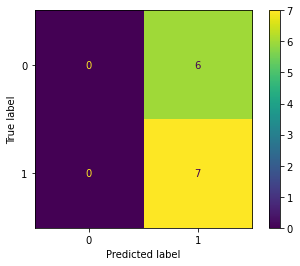

In [76]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, preds)).plot()

Modele nie są w stanie dobrze klasyfikować danych. Mimo lekkiej dysproporcji wielkości klas (40% - 60%) nie powinno to wpływać 
na model. Nawet najlepsze uzyskane modele miały tylko 53% dokładności +- 9% podczas cv. Bardzo duży wpływ może mieć ilość wybranych komponentów w PCA, dwa komponenty objaśniają jedynie 50% wariancji - jest to zdecydowanie za mało. Również wykres komponentów PCA wskazuje na to, że dane określone za pomocą dwóch komponentów nie dzielą się na dwa oddzielne zbiory, zatem osiągnięcie dużej dokładności klasyfikacji jest niemożliwe. Dużym problem jest również mała ilość danych (przebadanych pacjentów).

In [51]:
#PCA dla 95% objaśnianej wariancji

In [52]:
train_X, test_X, train_Y, test_Y = train_test_split(rescaled_data, data_label, random_state = 133, test_size = 0.2, shuffle = True)

In [53]:
train_X.shape, train_Y.shape

((49, 15), (49, 1))

In [54]:
test_X.shape, test_Y.shape

((13, 15), (13, 1))

<AxesSubplot:ylabel='Count'>

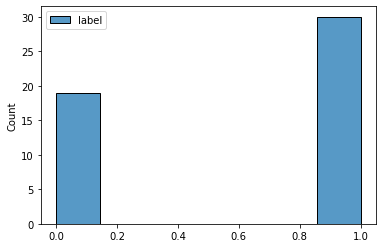

In [55]:
sns.histplot(train_Y)

<AxesSubplot:ylabel='Count'>

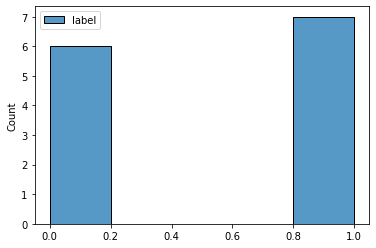

In [56]:
sns.histplot(test_Y)

In [57]:
pca_95 = PCA(0.95)

In [58]:
pca_95.fit(train_X)

PCA(n_components=0.95)

In [59]:
train_X = pca_95.transform(train_X)
test_X = pca_95.transform(test_X)

In [60]:
train_X.shape, test_X.shape

((49, 8), (13, 8))

In [61]:
train_Y = np.array(train_Y).reshape(len(train_Y))
test_Y = np.array(test_Y).reshape(len(test_Y))

In [62]:
train_Y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0], dtype=int64)

In [64]:
GSCV_95 = GridSearchCV(SGDClassifier(), grid, scoring = {'AUC' : 'roc_auc'}, refit = 'AUC', cv = 5)

GSCV_95.fit(train_X, train_Y)

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\pstrz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'eta0': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0],
                         'learning_rate': ['constant'],
                         'loss': ['hinge', 'log'],
                         'max_iter': [100, 200, 500, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2'], 'random_state': [False]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [65]:
GSCV_95.best_params_

{'alpha': 0.01,
 'eta0': 100.0,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'l1',
 'random_state': False}

In [66]:
pred = GSCV_95.predict(test_X)

In [67]:
accuracy_score(test_Y, pred)

0.5384615384615384

In [68]:
balanced_accuracy_score(test_Y, pred)

0.5238095238095238

In [69]:
roc_auc_score(test_Y, pred)

0.5238095238095238

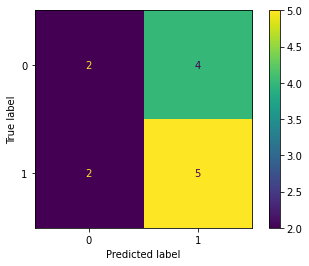

In [77]:
ConfusionMatrixDisplay(confusion_matrix(test_Y, pred)).plot()

In [71]:
precision_score(test_Y, pred)

0.5555555555555556

In [72]:
recall_score(test_Y, pred)

0.7142857142857143

In [73]:
f1_score(test_Y, pred)

0.6250000000000001

Zwiększenie ilości komponentów nie dało lepszych rezultatów.